# 데이터셋 불러오기

In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np

In [4]:
#데이터셋 로드
iris = load_iris()
df = pd.DataFrame(data=np.c_[iris.data, iris.target])
df
df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'target']
df

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


# 2차원 T-SNE 시각화

In [5]:
from sklearn.manifold import TSNE

In [10]:
train = df[['sepal_length', "sepal_width", "petal_length", "petal_width"]]
train

#2차원 t-sne 임베딩
tsne = TSNE(n_components = 2)
tsne

TSNE()

In [15]:
tsne_df = pd.DataFrame(tsne.fit_transform(train), columns = ['component 0', 'component 1'])
tsne_df

,component 0,component 1
0,-23.875437,-1.430589
1,-21.332832,-2.522965
2,-21.183956,-1.316485
3,-20.842545,-1.611920
4,-23.845785,-0.945733
...,...,...
145,15.408048,-1.407380
146,12.035444,-1.459038
147,14.410233,-1.398059
148,15.347630,-3.389599


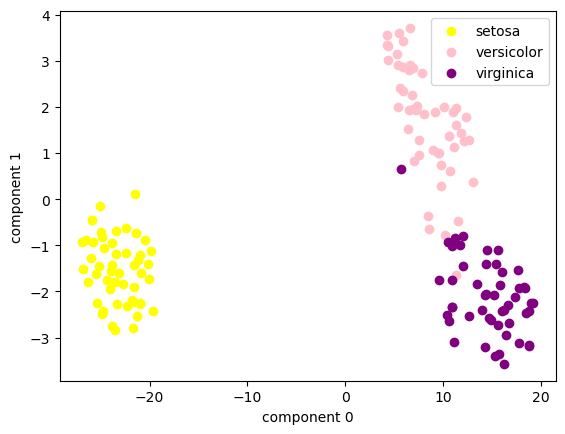

In [17]:
import matplotlib.pyplot as plt

tsne_df['target'] = df['target']
tsne_df

#target별 분리
tsne_0 = tsne_df[tsne_df['target']==0]
tsne_1 = tsne_df[tsne_df['target']==1]
tsne_2 = tsne_df[tsne_df['target']==2]

#target 시각화
plt.scatter(tsne_0['component 0'], tsne_0['component 1'], color = 'yellow', label = 'setosa')
plt.scatter(tsne_1['component 0'], tsne_1['component 1'], color = 'pink', label = 'versicolor')
plt.scatter(tsne_2['component 0'], tsne_2['component 1'], color = 'purple', label = 'virginica')

plt.xlabel('component 0')
plt.ylabel('component 1')
plt.legend()
plt.show()

# 3D 그래프 생성 예제

In [18]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

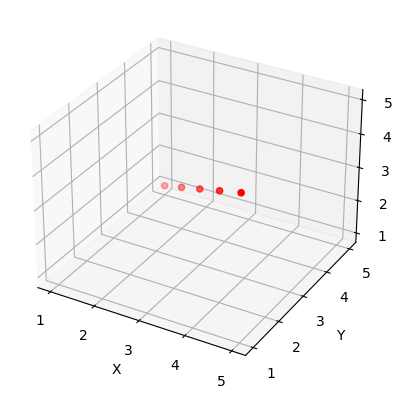

In [21]:
x = [1, 2, 3, 4, 5]
y = [5, 4, 3, 2, 1]
z = [1, 2, 3, 4, 5]

#3d 그래프 생성
figure = plt.figure()
axes = figure.add_subplot(111, projection = "3d")

#데이터
axes.scatter(x, y, z, c="r", marker = "o")
axes.set_xlabel("X")
axes.set_ylabel("Y")
axes.set_zlabel("Z")

plt.show()

# 3차원 iris 그래프

In [25]:
tsne_df = TSNE(n_components = 3).fit_transform(train)
tsne_df

#넘파이 배열로 나오기 때문에 데이터 프레임으로 변환
tsne_df = pd.DataFrame(tsne_df, columns = ['component 0','component 1', 'component 2'])
tsne_df

,component 0,component 1,component 2
0,-26.533897,45.716568,-9.819800
1,-55.721172,24.290920,12.398039
2,-32.218525,28.902399,24.453581
3,-34.480396,-3.122183,31.611584
4,-11.582963,39.515251,-3.913848
...,...,...,...
145,48.679161,7.824016,16.280586
146,40.068836,-23.984703,-20.779505
147,44.114338,-3.671464,2.509907
148,72.106171,12.165637,-0.078569


In [22]:
from mpl_toolkits.mplot3d import Axes3D

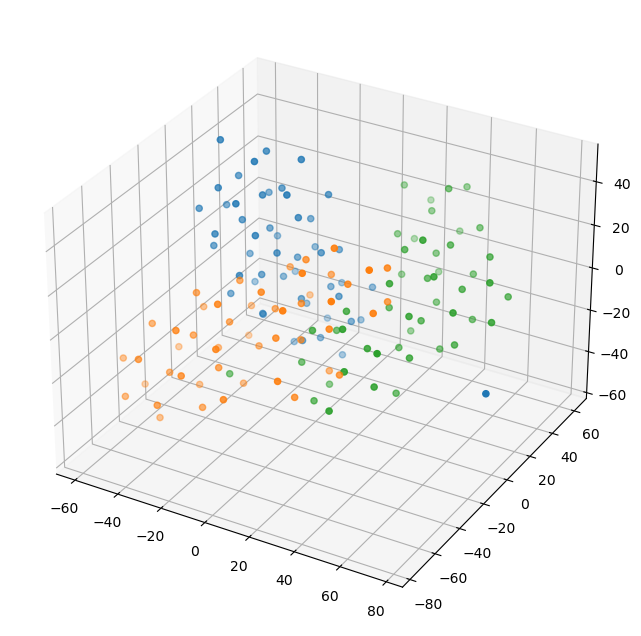

In [26]:
figure = plt.figure(figsize = (12, 8))
axes = figure.add_subplot(111, projection="3d")

#target
tsne_df['target'] = df['target']

#target별 분리
tsne_0 = tsne_df[tsne_df['target']==0]
tsne_1 = tsne_df[tsne_df['target']==1]
tsne_2 = tsne_df[tsne_df['target']==2]

#target 별 시각화
axes.scatter(tsne_0['component 0'], tsne_0['component 1'], tsne_0['component 2'])
axes.scatter(tsne_1['component 0'], tsne_1['component 1'], tsne_1['component 2'])
axes.scatter(tsne_2['component 0'], tsne_2['component 1'], tsne_2['component 2'])

plt.show()